Accuracy of Naive Bayes classifier = 99.75 %


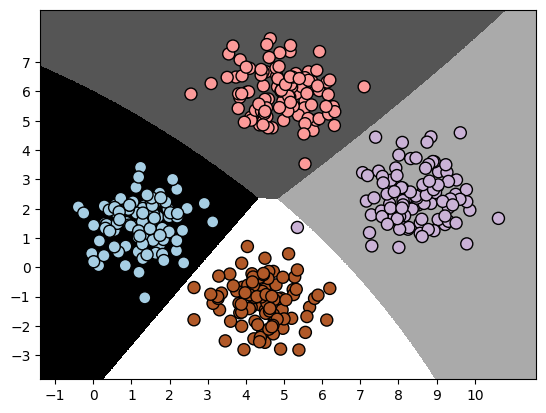

In [16]:
import numpy as np 
from sklearn.naive_bayes import GaussianNB
%run utilities.ipynb

input_file = 'data_multivar_nb.txt' 

data = np.loadtxt(input_file, delimiter=',') 
X, y = data[:, :-1], data[:, -1] 

classifier = GaussianNB()
classifier.fit(X, y)

y_pred = classifier.predict(X)

accuracy = 100.0 * (y == y_pred).sum() / X.shape[0] 
print("Accuracy of Naive Bayes classifier =", round(accuracy, 2), "%") 

visualize_classifier(classifier, X, y)

Accuracy of the new classifier = 100.0 %


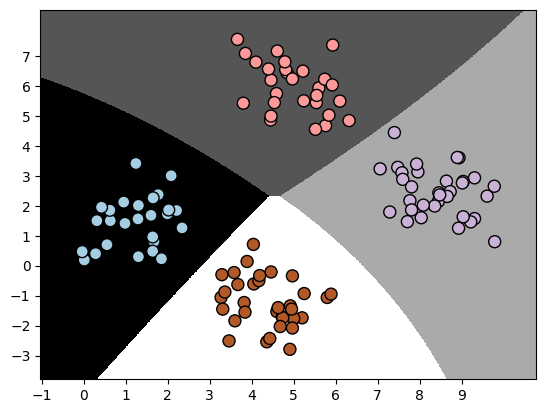

Accuracy: 99.75%
Precision: 99.76%
Recall: 99.75%
F1: 99.75%


In [17]:
from sklearn import model_selection 

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                      test_size=0.3, random_state=3) 
classifier_new = GaussianNB() 
classifier_new.fit(X_train, y_train) 
y_test_pred = classifier_new.predict(X_test) 

accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0] 
print("Accuracy of the new classifier =", round(accuracy, 2), "%") 

visualize_classifier(classifier_new, X_test, y_test) 

num_folds = 3 
accuracy_values = model_selection.cross_val_score(classifier, 
                      X, y, scoring='accuracy', cv=num_folds) 
print("Accuracy: " + str(round(100*accuracy_values.mean(), 2)) + "%") 

precision_values = model_selection.cross_val_score(classifier, 
                      X, y, scoring='precision_weighted', cv=num_folds) 
print("Precision: " + str(round(100*precision_values.mean(), 2)) + "%") 

recall_values = model_selection.cross_val_score(classifier, 
                      X, y, scoring='recall_weighted', cv=num_folds) 
print("Recall: " + str(round(100*recall_values.mean(), 2)) + "%") 

f1_values = model_selection.cross_val_score(classifier, 
                      X, y, scoring='f1_weighted', cv=num_folds) 
print("F1: " + str(round(100*f1_values.mean(), 2)) + "%") 
